In [21]:
import pandas as pd
import jieba
import itertools
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Matplotlib is building the font cache; this may take a moment.


In [11]:
data = pd.read_csv('douban.csv', encoding='utf-8')

In [12]:
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read()
stopwords = ['\n', '',' '] + stopwords.split()

In [13]:
data_cut = data['短评正文'].apply(jieba.lcut)
data_after = data_cut.apply(lambda x: [i for i in x if i not in stopwords])  

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/8j/fqb7rx494yl3_ynlrl35vnr40000gn/T/jieba.cache
Loading model cost 0.306 seconds.
Prefix dict has been built successfully.


In [18]:
data_after


0     [咔嚓, 震天响, 战狼, 当球长, 带领, 人类, 救, 地球, 一场, 大火, 有部, ...
1     [女, 添麻烦, 不懂事, 价值观, 反, 人类, 反, 文明, 反, 自然, 文化, 艺术...
2     [编剧, 30, 分钟, 设定, 成, 地球, 空间站, 自我牺牲, 救, 地球, 空间站,...
3     [完整, 宏大, 节奏, 泪点, 踏实, 风靡, 胡乱, 吹, 逼, 高冷, 鄙视, 链, ...
4     [宣传, 价值观, 刘启, 二十多, 不懂事, 自私, 自负, 一点, 礼貌, 姥爷, 一口...
                            ...                        
75                         [目测, 一大, 波, 中国式, 土味, 科幻, 大片]
76                             [吴京, 戴, 同传机, 忍不住, 笑, 出声]
77                                           [ptsd, 发作]
78    [惊喜, 遗憾, 这部, 电影, 证明, 中国, 导演, 技术, 层面, 能力, 拍出, 逊...
79    [太过, 誉, 导演, 讲故事, 糟蹋, 冗长, 画面, 衔接, 流畅, 特效, 外国, 3...
Name: 短评正文, Length: 80, dtype: object

In [25]:
word_fre = pd.Series(list(itertools.chain.from_iterable(data_after))).value_counts()

In [22]:
mask = plt.imread('7865.png_300.png')

In [30]:
wc = WordCloud(background_color='white', mask=mask, font_path='HYSongYunLangHeiW-1.ttf')

In [31]:
wc.fit_words(word_fre)

/Users/cloudhot/learn/python/dbpc/.venv/lib/python3.12/site-packages/wordcloud/wordcloud.py:1003: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

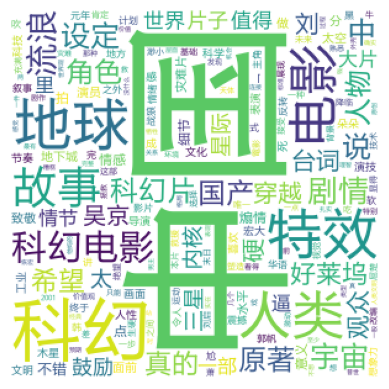

In [32]:
plt.imshow(wc)
plt.axis('off')

In [39]:
def my_word_cloud(_data=None, _stopwords=None):
    _data_cut = _data.apply(jieba.lcut)
    _data_after = _data_cut.apply(lambda x: [i for i in x if i not in _stopwords]) 
    _word_fre = pd.Series(list(itertools.chain.from_iterable(_data_after))).value_counts()
    _mask = plt.imread('7865.png_300.png')
    wc.fit_words(_word_fre)
    plt.imshow(wc)
    plt.axis('off')

In [40]:
index_negative = data['评分'] < 30 # 差评索引
index_positive = data['评分'] >= 30 # 好评索引

/Users/cloudhot/learn/python/dbpc/.venv/lib/python3.12/site-packages/wordcloud/wordcloud.py:1003: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


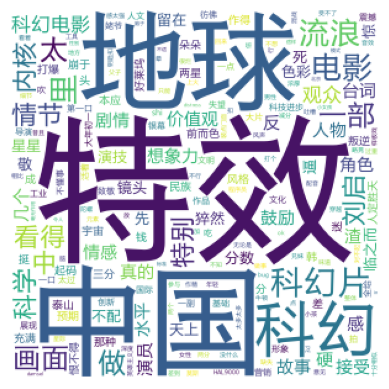

In [41]:
my_word_cloud(data['短评正文'][index_negative], stopwords)

/Users/cloudhot/learn/python/dbpc/.venv/lib/python3.12/site-packages/wordcloud/wordcloud.py:1003: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


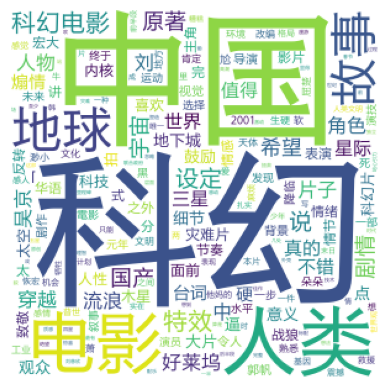

In [42]:
my_word_cloud(data['短评正文'][index_positive], stopwords)

/Users/cloudhot/learn/python/dbpc/.venv/lib/python3.12/site-packages/wordcloud/wordcloud.py:1003: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


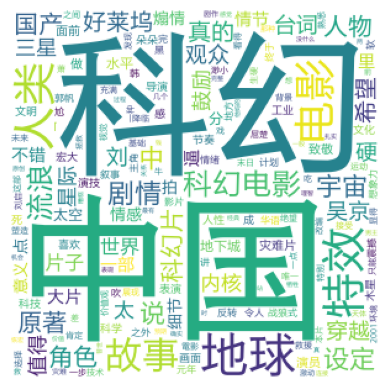

In [43]:
my_word_cloud(data['短评正文'], stopwords) # 全部